In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import vstack
from sklearn.manifold import TSNE

plt.style.use("dark_background")


df = pd.read_csv("../data/interim/complete_data.csv")

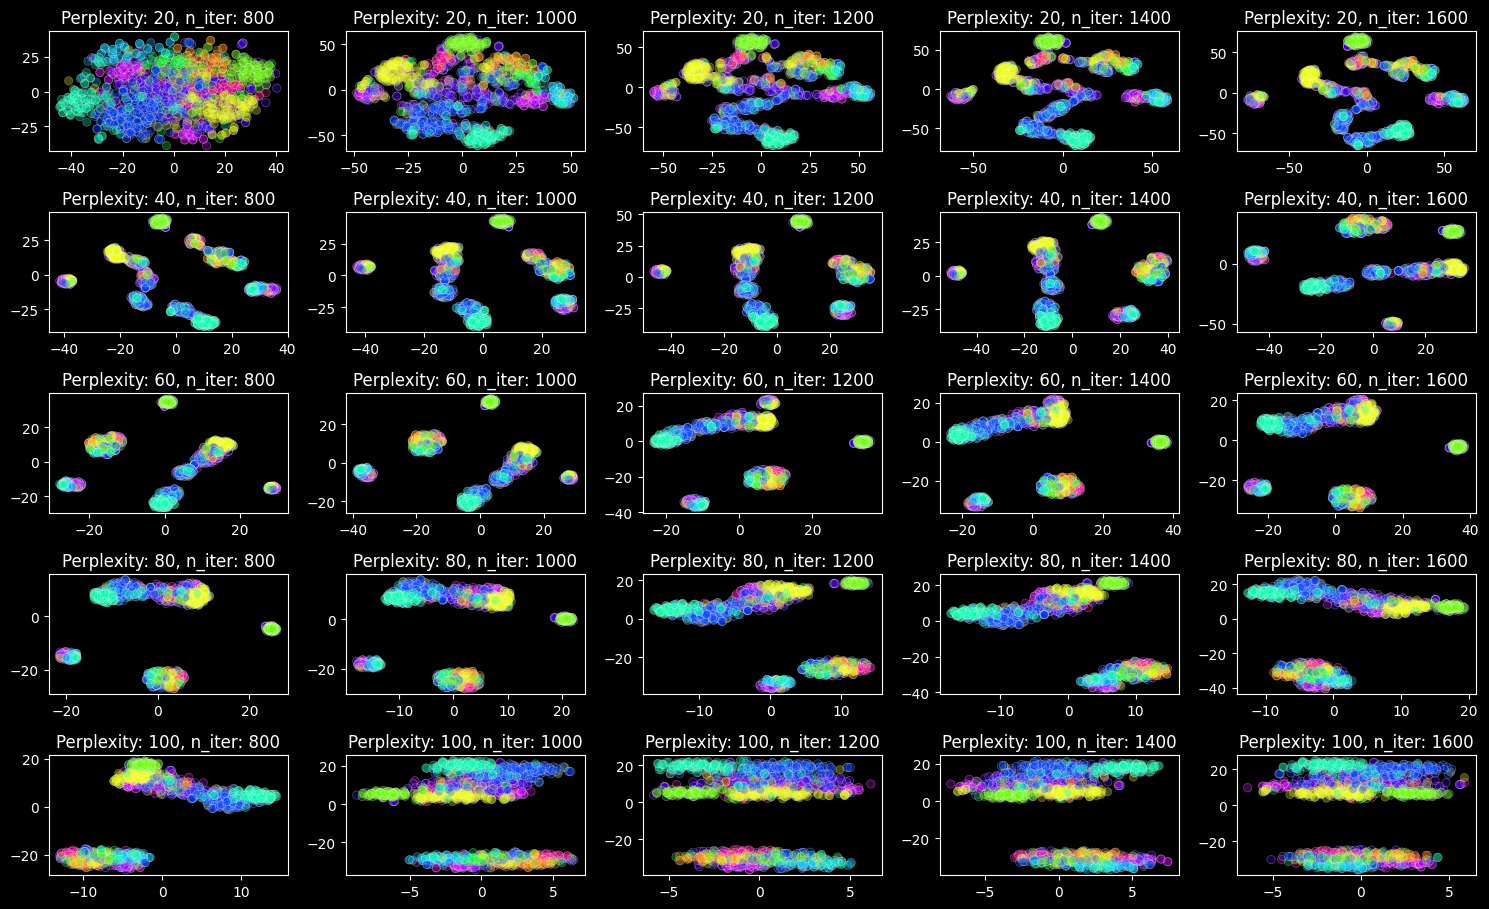

In [35]:
n_iters = [800, 1000, 1200, 1400, 1600]
perplexities = [20, 40, 60, 80, 100]

fig, axes = plt.subplots(len(perplexities), len(n_iters), figsize=(15, 10))

for i, perplexity in enumerate(perplexities):
    for j, n_iter in enumerate(n_iters):
        tsne_results = TSNE(
            n_components=2,
            perplexity=perplexity,
            max_iter=n_iter,
            random_state=42,
            n_jobs=-1,
        ).fit_transform(
            vstack(
                df.drop(
                    columns=["syndrome_id", "subject_id", "image_id", "embedding_id"]
                ).values
            )
        )
        df["tsne-2d-y"] = tsne_results[:, 0]
        df["tsne-2d-x"] = tsne_results[:, 1]

        sns.scatterplot(
            x="tsne-2d-x",
            y="tsne-2d-y",
            hue="syndrome_id",
            palette=sns.color_palette("hsv", len(df["syndrome_id"].value_counts())),
            data=df,
            legend=False,  # i'm Considering a single legend outside the grid. :)
            alpha=0.3,
            ax=axes[i, j],
        )
        axes[i, j].set_title(f"Perplexity: {perplexity}, n_iter: {n_iter}")
        axes[i, j].set_xlabel("")  # remove xlabel & ylabel for cleaner grid
        axes[i, j].set_ylabel("")

# # FIXME: unique legend not plotting :(
# handles, labels = axes[0, 0].get_legend_handles_labels()
# fig.legend(
#     handles, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=len(labels)
# )
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("../../reports/tsne_2d_grid_plot.png", dpi=300)
plt.show()